# **Question 2 - Part B**

**Supervised Learning Algorithms - Multiple Linear Regression (Multivariate):** Consider any dataset from UCI repository. Create Multiple Linear Regression models using the training data set. Predict the scores on the test data and find the error in prediction (E.g. RMSE, MAE, LSE).  Include appropriate code snippets to visualize the model. Use Sub-Plots Interpret the result. Write the Inference.

[Kaggle Dataset link](https://www.kaggle.com/datasets/ashydv/advertising-dataset/download?datasetVersionNumber=1)<br>
[Dataset which mam gave](https://drive.google.com/file/d/1FDTz9fmbxQwzXhZwZ_OmHPf0-uebQpRe/view?usp=share_link)
- In dataset given by mam code remains same only before doing anything on the dataframe we have to run df.drop(['Unnamed: 0'], axis=1),to drop the extra column.
## Dataset Description

In this Program the data set used is ***'advertising.csv'***
It shows the money spent on **TV**, **Radio** and **Newspaper** Ads and the ***Sales*** Income generated. 
The Dataset is 200 rows and 4 columns. (TV, Radio,Newspaper and Sales).


In [7]:
# Importing dataset
import pandas as pd
df=pd.read_csv('advertising.csv')
print(df.head())
print("Dataframe shape is = ",df.shape)

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
Dataframe shape is =  (200, 4)


In [8]:
#Importing required libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#This time pass all parameters except the sales into x and sales as y
#75-25 ratio train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop(['Sales'],axis=1),df['Sales'],test_size=0.25)
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

# **Display Values of Slope and Intercept and Infer from it**

**Linear Model is: 4.6154 + 0.053815 X TV + 0.10737 X Radio + 0.0021183 X Newspaper**

This is a Multi-Variant Linear Regression Model Equation. 

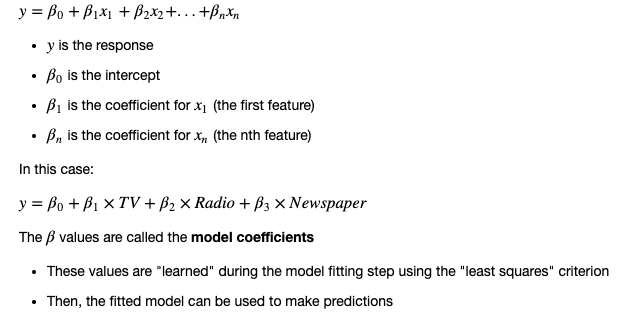
 
**Inference 1** 
Meaning of Coefficient 

E.g. TV Coefficient 0.0466<br>
For a given amount of Radio and Newspaper ad spending, a "unit" increase in TV ad spending is associated with a 0.0466 "unit" increase in Sales.
Or more clearly: For a given amount of Radio and Newspaper ad spending, an additional $1,000 spent on TV ads is associated with an increase in sales of 46.6 items.

How $1,000? 
46.6 Units = 0.0466 x 1000 

**Inference 2**
If an increase in TV ad spending was associated with a decrease in sales,  β1  would be negative.

In [9]:
print("Coeffs of the equation = {} \nIntercept = {} ".format(lr.coef_,lr.intercept_))
print("The linear model is: Y = {:.5} + {:.5}*TV + {:.5}*Radio + {:.5}*Newspaper".format(lr.intercept_, lr.coef_[0], lr.coef_[1], lr.coef_[2]))

Coeffs of the equation = [0.05396211 0.09960917 0.00511583] 
Intercept = 4.613492444160283 
The linear model is: Y = 4.6135 + 0.053962*TV + 0.099609*Radio + 0.0051158*Newspaper


In [10]:
#Predicting values from test set 
y_pred = lr.predict(x_test)


# **Model Evaluation Metrics for Regression**
**Note:** Evaluation metrics for classification problems, such as accuracy, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuous values.

Three common evaluation metrics for regression problems are:


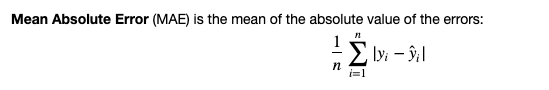
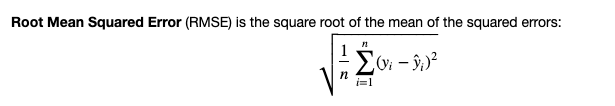
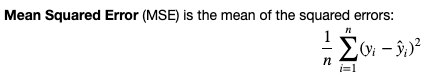
**Comparing these metrics:**

**MAE** is the easiest to understand, because it's the average error.

**MSE** is more popular than MAE, because MSE "punishes" larger errors.

**RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units. Easier to put in context as it's the same units as our response variable

In [11]:
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error

pred = lr.predict(x_test)

#Finding Root Mean Sqaured Error
rmse=np.sqrt(mean_squared_error(y_test,pred))
#Finiding Mean Absolute Error
mae = mean_absolute_error(y_test,pred)
#Finding Mean Squared Error
mse = mean_squared_error(y_test,pred)
#Printing all error matrics
print("Root Mean Square Srror= {}\nMean Absolute Error = {}\nMean Squared Error = {}".format(rmse,mae,mse))
print("Score",lr.score(df.drop(['Sales'],axis=1),df['Sales']))


Root Mean Square Srror= 1.5032217779940122
Mean Absolute Error = 1.192861527567521
Mean Squared Error = 2.2596757138354797
Score 0.9015743243887756


# **Taking only 2 features**

In [12]:
def trainOnly2Features(f1,f2):
    print(("Only taking features "+f1+" & "+f2).center(50,'='))
    x_train,x_test,y_train,y_test=train_test_split(df[[f1,f2]],df['Sales'],test_size=0.25)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    #Printing Coeff and intercept of the model
    print("Coeffs of the equation = {} \nIntercept = {} ".format(lr.coef_,lr.intercept_))
    print("The linear model is: Y = {:.5} + {:.5}*{} + {:.5}*{} ".format(lr.intercept_, lr.coef_[0],f1, lr.coef_[1],f2))
    pred = lr.predict(x_test)
    #Finding Root Mean Sqaured Error
    rmse=np.sqrt(mean_squared_error(y_test,pred))
    #Finiding Mean Absolute Error
    mae = mean_absolute_error(y_test,pred)
    #Finding Mean Squared Error
    mse = mean_squared_error(y_test,pred)
    #Printing all error matrics
    print("Root Mean Square Srror= {}\nMean Absolute Error = {}\nMean Squared Error = {}".format(rmse,mae,mse))


In [13]:
trainOnly2Features('TV','Radio')
trainOnly2Features('Radio','Newspaper')
trainOnly2Features('TV','Newspaper')

=========Only taking features TV & Radio==========
Coeffs of the equation = [0.05318735 0.10928212] 
Intercept = 4.807415149907047 
The linear model is: Y = 4.8074 + 0.053187*TV + 0.10928*Radio 
Root Mean Square Srror= 1.5247527488961323
Mean Absolute Error = 1.210695181610816
Mean Squared Error = 2.3248709452663117
======Only taking features Radio & Newspaper======
Coeffs of the equation = [0.12801433 0.00492037] 
Intercept = 12.03287106551186 
The linear model is: Y = 12.033 + 0.12801*Radio + 0.0049204*Newspaper 
Root Mean Square Srror= 4.511234652002382
Mean Absolute Error = 3.9533497951163827
Mean Squared Error = 20.351238085427052
=======Only taking features TV & Newspaper========
Coeffs of the equation = [0.05526283 0.02403472] 
Intercept = 6.292631342486995 
The linear model is: Y = 6.2926 + 0.055263*TV + 0.024035*Newspaper 
Root Mean Square Srror= 1.7652752664776705
Mean Absolute Error = 1.4619781167608616
Mean Squared Error = 3.116196766437811


# **Visualize the data**

Using seaborn package as it has advanced visualization features 

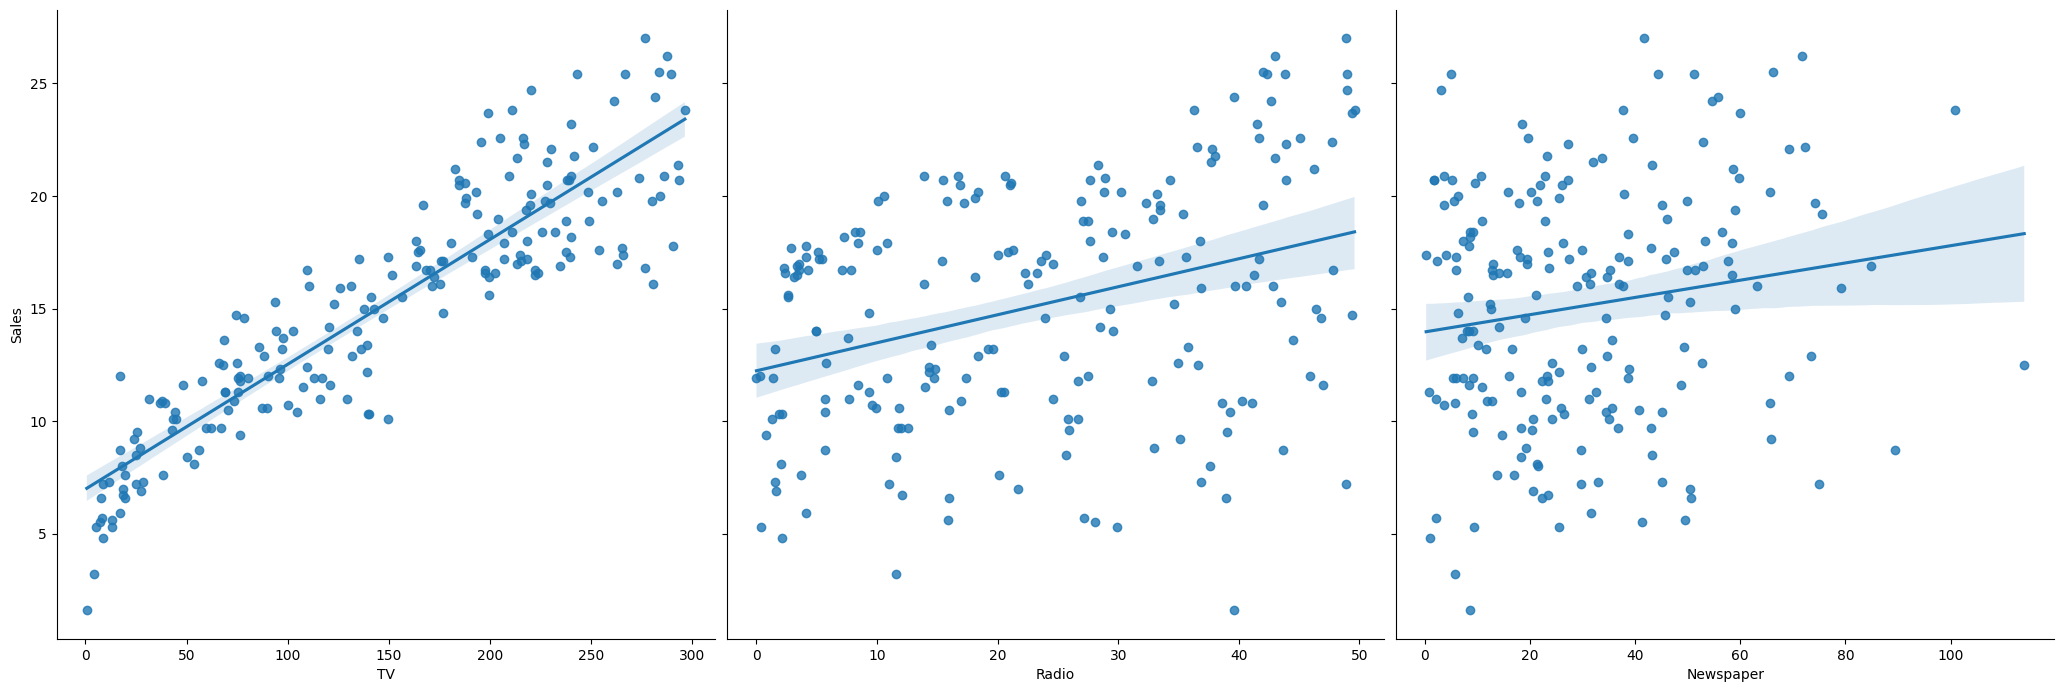

In [14]:
import seaborn as sns

sns.pairplot(df,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',kind='reg',height=7,aspect=1)

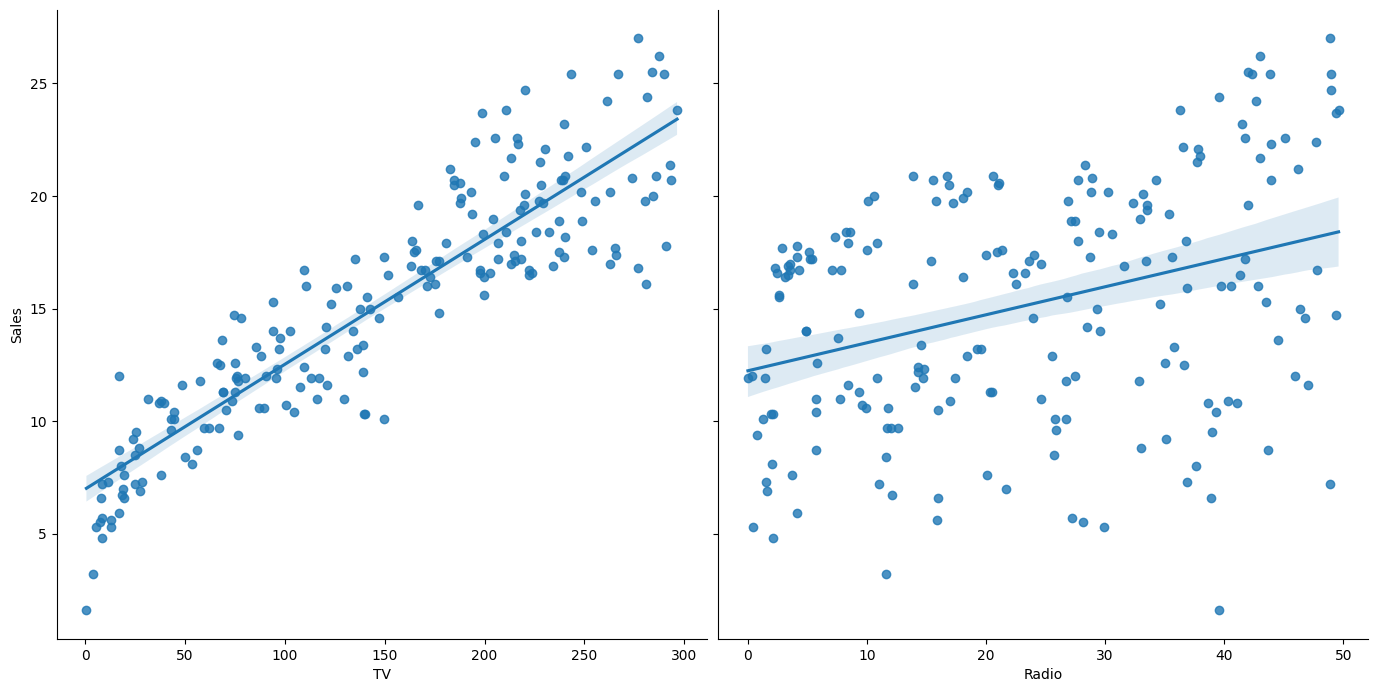

In [15]:
#Since we get least mean square error when we remove newspaper so
sns.pairplot(df,x_vars=['TV','Radio'],y_vars='Sales',kind='reg',height=7,aspect=1)

# **Inference:**
The RMSE decreased when we removed Newspaper from the model. (Error is something we want to minimize, so a lower number for RMSE is better.

Thus, it is unlikely that this feature (Newspaper)is useful for predicting Sales, and should be removed from the model.